In [79]:
# importing dependencies
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from IPython.display import display

In [80]:
data = pd.read_csv('game_teams_stats.csv')
display(data.head())

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2012030221,3,away,False,OT,John Tortorella,2,35,44,8,3,0,44.8,17,7
1,2012030221,6,home,True,OT,Claude Julien,3,48,51,6,4,1,55.2,4,5
2,2012030222,3,away,False,REG,John Tortorella,2,37,33,11,5,0,51.7,1,4
3,2012030222,6,home,True,REG,Claude Julien,5,32,36,19,1,0,48.3,16,6
4,2012030223,6,away,True,REG,Claude Julien,2,34,28,6,0,0,61.8,10,7


In [81]:
data.columns

Index(['game_id', 'team_id', 'HoA', 'won', 'settled_in', 'head_coach', 'goals',
       'shots', 'hits', 'pim', 'powerPlayOpportunities', 'powerPlayGoals',
       'faceOffWinPercentage', 'giveaways', 'takeaways'],
      dtype='object')

In [82]:
data.info

<bound method DataFrame.info of           game_id  team_id   HoA    won settled_in        head_coach  goals  \
0      2012030221        3  away  False         OT   John Tortorella      2   
1      2012030221        6  home   True         OT     Claude Julien      3   
2      2012030222        3  away  False        REG   John Tortorella      2   
3      2012030222        6  home   True        REG     Claude Julien      5   
4      2012030223        6  away   True        REG     Claude Julien      2   
5      2012030223        3  home  False        REG   John Tortorella      1   
6      2012030224        6  away  False         OT     Claude Julien      3   
7      2012030224        3  home   True         OT   John Tortorella      4   
8      2012030225        3  away  False        REG   John Tortorella      1   
9      2012030225        6  home   True        REG     Claude Julien      3   
10     2012030311        6  away   True        REG     Claude Julien      3   
11     2012030311   

In [83]:
data.shape

(14882, 15)

In [84]:
data.dropna(how ='any').shape

(14882, 15)

In [85]:
newdata = data.drop(data.columns[5], axis=1)
newdata

,game_id,team_id,HoA,won,settled_in,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2012030221,3,away,False,OT,2,35,44,8,3,0,44.8,17,7
1,2012030221,6,home,True,OT,3,48,51,6,4,1,55.2,4,5
2,2012030222,3,away,False,REG,2,37,33,11,5,0,51.7,1,4
3,2012030222,6,home,True,REG,5,32,36,19,1,0,48.3,16,6
4,2012030223,6,away,True,REG,2,34,28,6,0,0,61.8,10,7
5,2012030223,3,home,False,REG,1,24,37,2,2,0,38.2,7,9
6,2012030224,6,away,False,OT,3,40,24,8,4,2,53.7,8,6
7,2012030224,3,home,True,OT,4,32,40,8,4,1,46.3,9,7
8,2012030225,3,away,False,REG,1,29,25,13,2,1,50.9,5,3
9,2012030225,6,home,True,REG,3,32,35,11,3,1,49.1,12,9


In [86]:
from sklearn.preprocessing import OrdinalEncoder

In [87]:
HoA = newdata[['HoA']]
HoA.head(14882)


,HoA
0,away
1,home
2,away
3,home
4,away
5,home
6,away
7,home
8,away
9,home


In [88]:
ordinal_encoder = OrdinalEncoder()
HoA_cat_encoded = ordinal_encoder.fit_transform(HoA)
HoA_cat_encoded[:14882]


array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]])

In [89]:
newdata['HoA']=HoA_cat_encoded[:14882]
newdata

,game_id,team_id,HoA,won,settled_in,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2012030221,3,0.0,False,OT,2,35,44,8,3,0,44.8,17,7
1,2012030221,6,1.0,True,OT,3,48,51,6,4,1,55.2,4,5
2,2012030222,3,0.0,False,REG,2,37,33,11,5,0,51.7,1,4
3,2012030222,6,1.0,True,REG,5,32,36,19,1,0,48.3,16,6
4,2012030223,6,0.0,True,REG,2,34,28,6,0,0,61.8,10,7
5,2012030223,3,1.0,False,REG,1,24,37,2,2,0,38.2,7,9
6,2012030224,6,0.0,False,OT,3,40,24,8,4,2,53.7,8,6
7,2012030224,3,1.0,True,OT,4,32,40,8,4,1,46.3,9,7
8,2012030225,3,0.0,False,REG,1,29,25,13,2,1,50.9,5,3
9,2012030225,6,1.0,True,REG,3,32,35,11,3,1,49.1,12,9


In [90]:
won = newdata[['won']]
won.head(14882)

,won
0,False
1,True
2,False
3,True
4,True
5,False
6,False
7,True
8,False
9,True


In [91]:
ordinal_encoder1 = OrdinalEncoder()
won_cat_encoded = ordinal_encoder.fit_transform(won)
newdata['won']=won_cat_encoded[:14882]
newdata

,game_id,team_id,HoA,won,settled_in,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2012030221,3,0.0,0.0,OT,2,35,44,8,3,0,44.8,17,7
1,2012030221,6,1.0,1.0,OT,3,48,51,6,4,1,55.2,4,5
2,2012030222,3,0.0,0.0,REG,2,37,33,11,5,0,51.7,1,4
3,2012030222,6,1.0,1.0,REG,5,32,36,19,1,0,48.3,16,6
4,2012030223,6,0.0,1.0,REG,2,34,28,6,0,0,61.8,10,7
5,2012030223,3,1.0,0.0,REG,1,24,37,2,2,0,38.2,7,9
6,2012030224,6,0.0,0.0,OT,3,40,24,8,4,2,53.7,8,6
7,2012030224,3,1.0,1.0,OT,4,32,40,8,4,1,46.3,9,7
8,2012030225,3,0.0,0.0,REG,1,29,25,13,2,1,50.9,5,3
9,2012030225,6,1.0,1.0,REG,3,32,35,11,3,1,49.1,12,9


In [92]:
settled_in = newdata[['settled_in']]
settled_in.head(14882)

,settled_in
0,OT
1,OT
2,REG
3,REG
4,REG
5,REG
6,OT
7,OT
8,REG
9,REG


In [93]:
ordinal_encoder2 = OrdinalEncoder()
settled_in_cat_encoded = ordinal_encoder.fit_transform(settled_in)
newdata['settled_in']=settled_in_cat_encoded[:14882]
newdata

,game_id,team_id,HoA,won,settled_in,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2012030221,3,0.0,0.0,0.0,2,35,44,8,3,0,44.8,17,7
1,2012030221,6,1.0,1.0,0.0,3,48,51,6,4,1,55.2,4,5
2,2012030222,3,0.0,0.0,1.0,2,37,33,11,5,0,51.7,1,4
3,2012030222,6,1.0,1.0,1.0,5,32,36,19,1,0,48.3,16,6
4,2012030223,6,0.0,1.0,1.0,2,34,28,6,0,0,61.8,10,7
5,2012030223,3,1.0,0.0,1.0,1,24,37,2,2,0,38.2,7,9
6,2012030224,6,0.0,0.0,0.0,3,40,24,8,4,2,53.7,8,6
7,2012030224,3,1.0,1.0,0.0,4,32,40,8,4,1,46.3,9,7
8,2012030225,3,0.0,0.0,1.0,1,29,25,13,2,1,50.9,5,3
9,2012030225,6,1.0,1.0,1.0,3,32,35,11,3,1,49.1,12,9


In [94]:
newdata['Actualteam_win']=newdata.shape[0]
newdata

,game_id,team_id,HoA,won,settled_in,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,Actualteam_win
0,2012030221,3,0.0,0.0,0.0,2,35,44,8,3,0,44.8,17,7,14882
1,2012030221,6,1.0,1.0,0.0,3,48,51,6,4,1,55.2,4,5,14882
2,2012030222,3,0.0,0.0,1.0,2,37,33,11,5,0,51.7,1,4,14882
3,2012030222,6,1.0,1.0,1.0,5,32,36,19,1,0,48.3,16,6,14882
4,2012030223,6,0.0,1.0,1.0,2,34,28,6,0,0,61.8,10,7,14882
5,2012030223,3,1.0,0.0,1.0,1,24,37,2,2,0,38.2,7,9,14882
6,2012030224,6,0.0,0.0,0.0,3,40,24,8,4,2,53.7,8,6,14882
7,2012030224,3,1.0,1.0,0.0,4,32,40,8,4,1,46.3,9,7,14882
8,2012030225,3,0.0,0.0,1.0,1,29,25,13,2,1,50.9,5,3,14882
9,2012030225,6,1.0,1.0,1.0,3,32,35,11,3,1,49.1,12,9,14882


In [95]:
newdata.columns

Index(['game_id', 'team_id', 'HoA', 'won', 'settled_in', 'goals', 'shots',
       'hits', 'pim', 'powerPlayOpportunities', 'powerPlayGoals',
       'faceOffWinPercentage', 'giveaways', 'takeaways', 'Actualteam_win'],
      dtype='object')

In [96]:
newdata['Actualteam_win']=newdata.apply(lambda x:'%d%d' % (x[2],x[3]),axis=1)
newdata

,game_id,team_id,HoA,won,settled_in,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,Actualteam_win
0,2012030221,3,0.0,0.0,0.0,2,35,44,8,3,0,44.8,17,7,00
1,2012030221,6,1.0,1.0,0.0,3,48,51,6,4,1,55.2,4,5,11
2,2012030222,3,0.0,0.0,1.0,2,37,33,11,5,0,51.7,1,4,00
3,2012030222,6,1.0,1.0,1.0,5,32,36,19,1,0,48.3,16,6,11
4,2012030223,6,0.0,1.0,1.0,2,34,28,6,0,0,61.8,10,7,01
5,2012030223,3,1.0,0.0,1.0,1,24,37,2,2,0,38.2,7,9,10
6,2012030224,6,0.0,0.0,0.0,3,40,24,8,4,2,53.7,8,6,00
7,2012030224,3,1.0,1.0,0.0,4,32,40,8,4,1,46.3,9,7,11
8,2012030225,3,0.0,0.0,1.0,1,29,25,13,2,1,50.9,5,3,00
9,2012030225,6,1.0,1.0,1.0,3,32,35,11,3,1,49.1,12,9,11


In [97]:
newdata = newdata.drop(data.columns[2], axis=1)

In [98]:
newdata = newdata.drop(data.columns[3], axis=1)

In [99]:
newdata

,game_id,team_id,settled_in,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,Actualteam_win
0,2012030221,3,0.0,2,35,44,8,3,0,44.8,17,7,00
1,2012030221,6,0.0,3,48,51,6,4,1,55.2,4,5,11
2,2012030222,3,1.0,2,37,33,11,5,0,51.7,1,4,00
3,2012030222,6,1.0,5,32,36,19,1,0,48.3,16,6,11
4,2012030223,6,1.0,2,34,28,6,0,0,61.8,10,7,01
5,2012030223,3,1.0,1,24,37,2,2,0,38.2,7,9,10
6,2012030224,6,0.0,3,40,24,8,4,2,53.7,8,6,00
7,2012030224,3,0.0,4,32,40,8,4,1,46.3,9,7,11
8,2012030225,3,1.0,1,29,25,13,2,1,50.9,5,3,00
9,2012030225,6,1.0,3,32,35,11,3,1,49.1,12,9,11


In [100]:
ATW_cat = newdata[['Actualteam_win']]
ordinal_encoder3 = OrdinalEncoder()
ATW_cat_encoded = ordinal_encoder.fit_transform(ATW_cat)
newdata['Actualteam_win']=ATW_cat_encoded[:14882]
newdata

,game_id,team_id,settled_in,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,Actualteam_win
0,2012030221,3,0.0,2,35,44,8,3,0,44.8,17,7,0.0
1,2012030221,6,0.0,3,48,51,6,4,1,55.2,4,5,3.0
2,2012030222,3,1.0,2,37,33,11,5,0,51.7,1,4,0.0
3,2012030222,6,1.0,5,32,36,19,1,0,48.3,16,6,3.0
4,2012030223,6,1.0,2,34,28,6,0,0,61.8,10,7,1.0
5,2012030223,3,1.0,1,24,37,2,2,0,38.2,7,9,2.0
6,2012030224,6,0.0,3,40,24,8,4,2,53.7,8,6,0.0
7,2012030224,3,0.0,4,32,40,8,4,1,46.3,9,7,3.0
8,2012030225,3,1.0,1,29,25,13,2,1,50.9,5,3,0.0
9,2012030225,6,1.0,3,32,35,11,3,1,49.1,12,9,3.0


In [101]:
#what is the win rate for the home team?

# Total number of matches.
no_indices = newdata.shape[0]
no_matches = no_indices/2

# Calculate number of features. -1 because we are saving one as the target variable (win/lose)
no_features = newdata.shape[1] - 1

# Calculate matches won by home team.
no_homewins = len(newdata[newdata.Actualteam_win==3.0])

# Calculate win rate for home team.
winning_rate = (float(no_homewins) / (no_matches)) * 100

# Print the results
print ("Total number of matches: {}".format(no_matches))
print ("Number of features: {}".format(no_features))
print ("Number of matches won by home team: {}".format(no_homewins))
print ("Win rate of home team: {:.2f}".format(winning_rate))

Total number of matches: 7441.0
Number of features: 12
Number of matches won by home team: 4089
Win rate of home team: 54.95


In [102]:
newdata.columns

Index(['game_id', 'team_id', 'settled_in', 'goals', 'shots', 'hits', 'pim',
       'powerPlayOpportunities', 'powerPlayGoals', 'faceOffWinPercentage',
       'giveaways', 'takeaways', 'Actualteam_win'],
      dtype='object')

'scatter_matrix_plot'

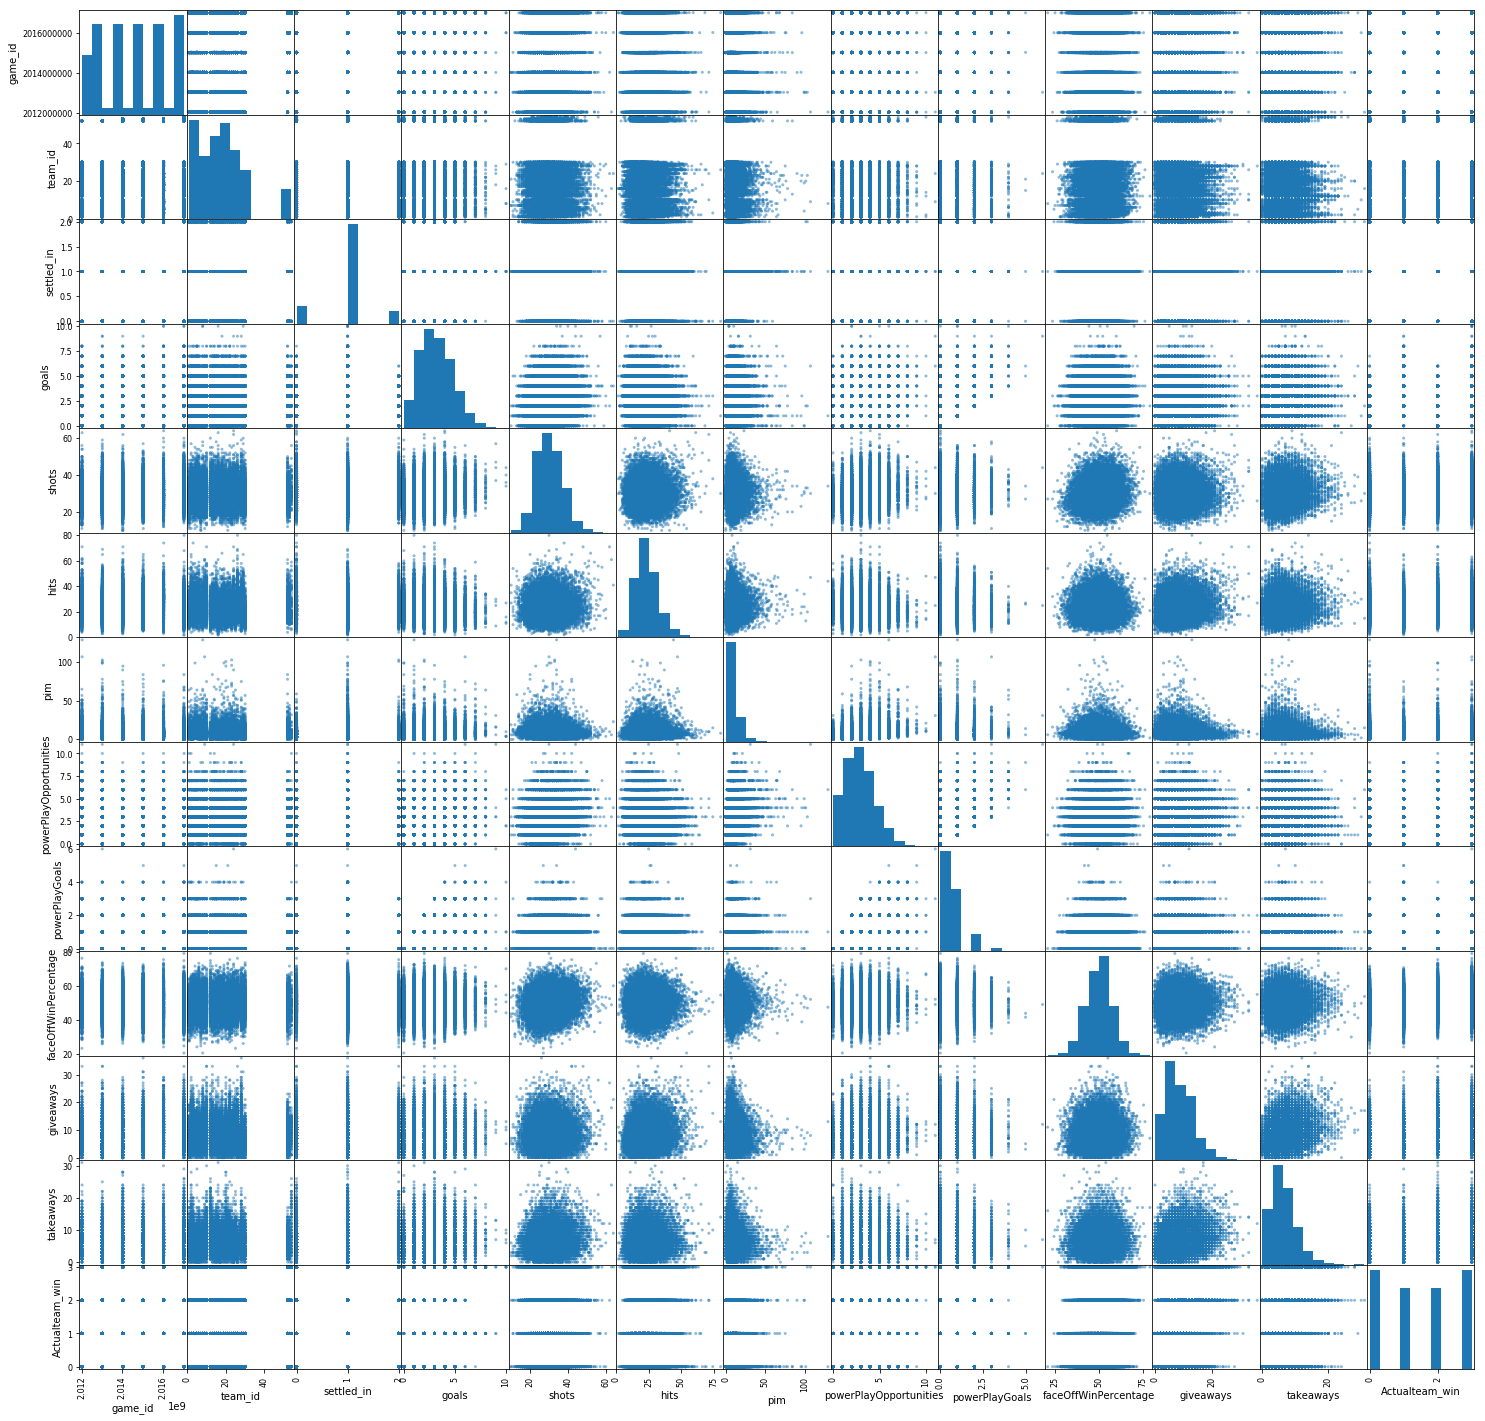

In [103]:
from pandas.plotting import scatter_matrix
%matplotlib inline
import matplotlib.pyplot as plt

attributes = ["game_id", "team_id", "settled_in", "goals", "shots",
       "hits", "pim", "powerPlayOpportunities", "powerPlayGoals",
       "faceOffWinPercentage", "giveaways", "takeaways", "Actualteam_win"]
scatter_matrix(newdata[attributes], figsize=(25, 25))
("scatter_matrix_plot")

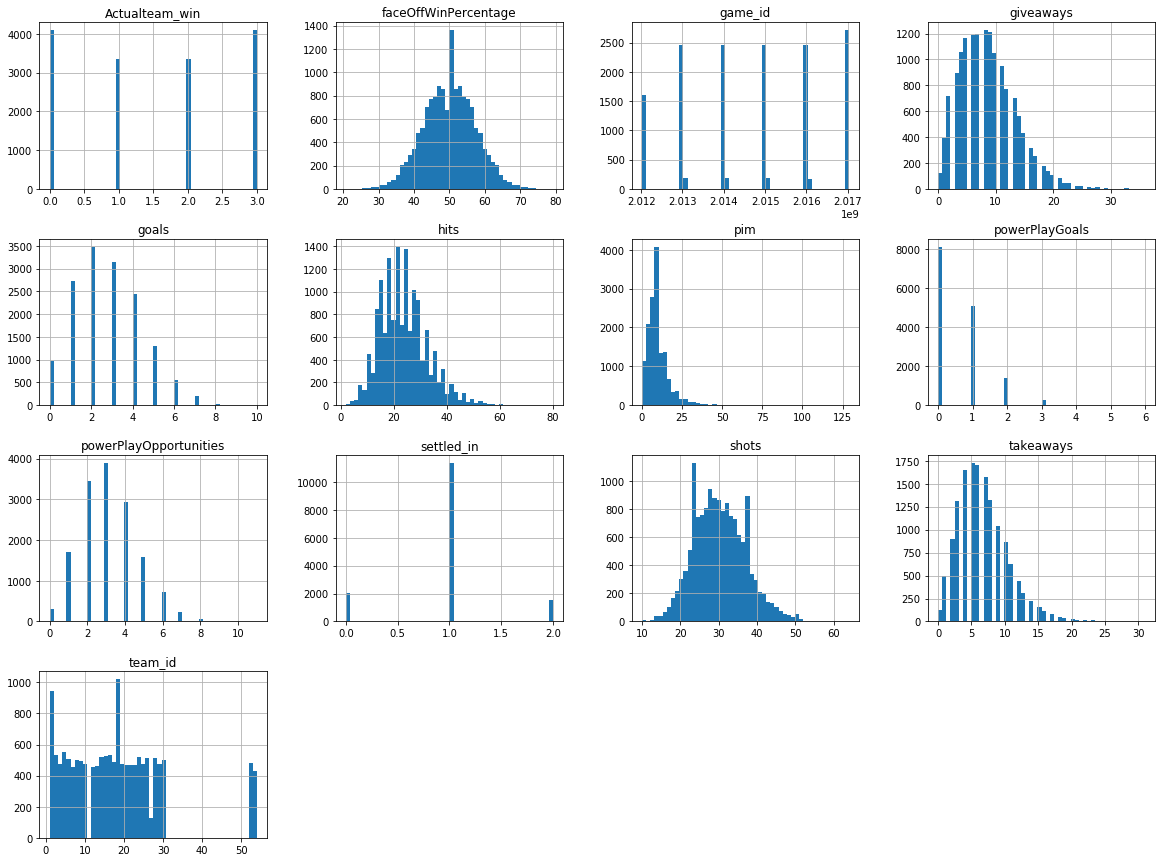

In [104]:
newdata.hist(bins=50, figsize=(20,15))
("attribute_histogram_plots")
plt.show()

In [140]:
# to make this notebook's output identical at every run
np.random.seed(42)


In [144]:
# Separate into feature set and target variable
#ATW_cat (0=Away team lost,1=away team won,2=home team lost,3=home team won)
X_all = newdata.drop(['Actualteam_win'],1)
y_all = newdata['Actualteam_win']

In [142]:
# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
cols = [['game_id', 'team_id', 'settled_in', 'goals', 'shots',
       'hits', 'pim', 'powerPlayOpportunities', 'powerPlayGoals',
       'faceOffWinPercentage', 'giveaways', 'takeaways']]
for col in cols:
    X_all[col] = scale(X_all[col])

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [145]:
def preprocess_features(X):
    ''' Preprocesses the nhl data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (12 total features):
['game_id', 'team_id', 'settled_in', 'goals', 'shots', 'hits', 'pim', 'powerPlayOpportunities', 'powerPlayGoals', 'faceOffWinPercentage', 'giveaways', 'takeaways']


In [137]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 2976,
                                                    random_state = 2,
                                                    stratify = y_all)

In [146]:
#for measuring training time
from time import time 
# F1 score (also F-score or F-measure) is a measure of a test's accuracy. 
#It considers both the precision p and the recall r of the test to compute 
#the score: p is the number of correct positive results divided by the number of 
#all positive results, and r is the number of correct positive results divided by 
#the number of positive results that should have been returned. The F1 score can be 
#interpreted as a weighted average of the precision and recall, where an F1 score 
#reaches its best value at 1 and worst at 0.
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    
    return f1_score(target, y_pred, pos_label=3, average="weighted"), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print (f1, acc)
    print ("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print ("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

In [147]:
# Initialize the three models (XGBoost is initialized later)
clf_A = LogisticRegression(random_state = 42)
clf_B = SVC(random_state = 912, kernel='rbf')
#Boosting refers to this general problem of producing a very accurate prediction rule 
#by combining rough and moderately inaccurate rules-of-thumb
clf_C = xgb.XGBClassifier(seed = 82)

train_predict(clf_A, X_train, y_train, X_test, y_test)
print ('')
train_predict(clf_B, X_train, y_train, X_test, y_test)
print ('')
train_predict(clf_C, X_train, y_train, X_test, y_test)
print ('')

Training a LogisticRegression using a training set size of 11906. . .
Trained model in 0.0628 seconds
Made predictions in 0.0030 seconds.
0.1184238760497234 0.27473542751553837
F1 score and accuracy score for training set: 0.1184 , 0.2747.
Made predictions in 0.0010 seconds.
F1 score and accuracy score for test set: 0.1185 , 0.2749.

Training a SVC using a training set size of 11906. . .


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1052: UserWarning: Note that pos_label (set to 3) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Owner\Anaconda3\lib\si

Trained model in 15.0935 seconds
Made predictions in 8.5566 seconds.
0.6755355589630206 0.6667226608432723
F1 score and accuracy score for training set: 0.6755 , 0.6667.


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1052: UserWarning: Note that pos_label (set to 3) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Made predictions in 2.4542 seconds.
F1 score and accuracy score for test set: 0.1185 , 0.2749.

Training a XGBClassifier using a training set size of 11906. . .


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1052: UserWarning: Note that pos_label (set to 3) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Trained model in 1.4989 seconds
Made predictions in 0.1448 seconds.
0.5569126211336544 0.5609776583235343
F1 score and accuracy score for training set: 0.5569 , 0.5610.
Made predictions in 0.0401 seconds.
F1 score and accuracy score for test set: 0.5242 , 0.5282.

